In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import re

In [3]:
def load_all_reviews(base_path='aclImdb'):
    data = []

    for split in ['train', 'test']:
        for sentiment in ['pos', 'neg']:
            folder = os.path.join(base_path, split, sentiment)
            label = 1 if sentiment == 'pos' else 0

            for filename in os.listdir(folder):
                file_path = os.path.join(folder, filename)
                with open(file_path, 'r', encoding='utf-8') as f:
                    review = f.read()
                    data.append({
                        'text': review,
                        'label': label,
                        'split': split
                    })

    return pd.DataFrame(data)

In [4]:
df = load_all_reviews('../aclImdb')

In [13]:
df

,text,label,split
0,Bromwell High is a cartoon comedy. It ran at t...,1,train
1,Homelessness (or Houselessness as George Carli...,1,train
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,train
3,This is easily the most underrated film inn th...,1,train
4,This is not the typical Mel Brooks film. It wa...,1,train
...,...,...,...
49995,I occasionally let my kids watch this garbage ...,0,test
49996,When all we have anymore is pretty much realit...,0,test
49997,The basic genre is a thriller intercut with an...,0,test
49998,Four things intrigued me as to this film - fir...,0,test


In [8]:
def clean_text(text):
    text = str(text).lower()  # к нижнему регистру
    text = re.sub(r'<[^>]+>', ' ', text)  # удалить HTML
    text = re.sub(r"[^a-z'\s]", ' ', text)  # оставить только буквы, пробелы и апострофы
    text = re.sub(r'\s+', ' ', text).strip()  # нормализовать пробелы
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [9]:
tv = TfidfVectorizer(
    stop_words='english',
    max_features=20000,
    ngram_range=(1, 2)
)
tv_results = tv.fit_transform(df['clean_text'])
tv_results.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(50000, 20000))

In [ ]:
X = tv_results
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
log_model = LogisticRegressionCV()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4981
           1       0.89      0.91      0.90      5019

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [31]:
confusion_matrix(y_test, y_pred)

array([[4422,  559],
       [ 450, 4569]])

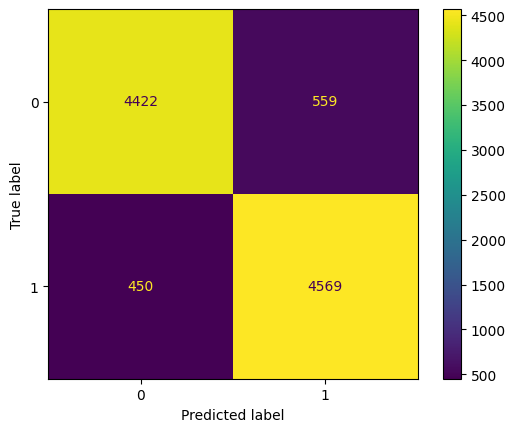

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
coefs = log_model.coef_[0]
features = np.array(tv.get_feature_names_out())

top_pos = features[np.argsort(coefs)[-20:]]
top_neg = features[np.argsort(coefs)[:20]]

print("Positive words:\n", top_pos[::-1])
print("Negative words:\n", top_neg)

🔵 Positive words:
 ['excellent' 'great' 'perfect' 'wonderful' 'best' 'amazing' 'favorite'
 'hilarious' 'today' 'loved' 'brilliant' 'enjoyed' 'superb' 'fantastic'
 'fun' 'incredible' 'enjoyable' 'entertaining' 'gem' 'perfectly']
🔴 Negative words:
 ['worst' 'awful' 'waste' 'boring' 'bad' 'poor' 'terrible' 'worse' 'dull'
 'horrible' 'disappointment' 'poorly' 'fails' 'disappointing' 'mediocre'
 'supposed' 'lame' 'instead' 'save' 'lacks']


In [39]:
scv_model = LinearSVC()
scv_model.fit(X_train, y_train)
y_pred_scv = scv_model.predict(X_test)
print(classification_report(y_test, y_pred_scv))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4981
           1       0.89      0.90      0.89      5019

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [40]:
confusion_matrix(y_test, y_pred)

array([[4422,  559],
       [ 450, 4569]])

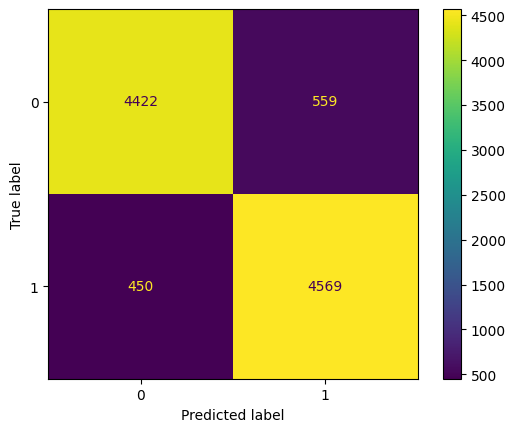

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [43]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
y_pred_mnb = mnb_model.predict(X_test)
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4981
           1       0.86      0.88      0.87      5019

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [44]:
confusion_matrix(y_test, y_pred_mnb)

array([[4271,  710],
       [ 585, 4434]])

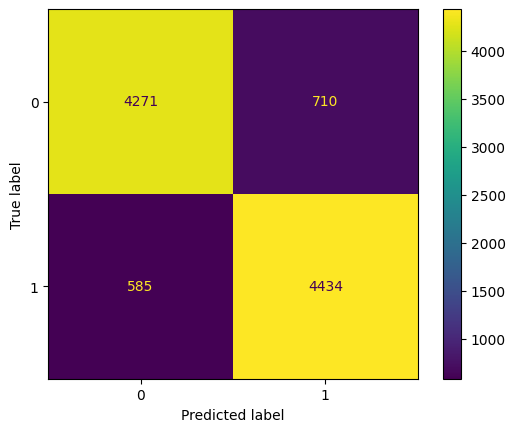

In [47]:
cm = confusion_matrix(y_test, y_pred_mnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();